In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from nptdms import TdmsFile #Process ramping file
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
def calculate_mat_time(ramp_num, dir_path):
    """
    Take a ramp's mat (MATHLAB produced) file and calculate its time axis from the current data 
    (set maximum current point at 0 and multiply by sampling rate). 
    
    Example usage: calculate_mat_time("Ramp_1", "15T_data")
    
    
    Args:
        - ramp_num (str): ramp number
        - dir_path (str): path to directory containing all the ramp's data
        
    Returns: None, save the calculated time axis to a npy file in dir_path + "/time_axis/"
    """
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    current_data = data[3, :]
    current_data = np.nan_to_num(current_data)
    
    #Add time axis relative to the time when quench happens
    time_range = np.asarray(range(current_data.shape[0]))
    
    #Calculate its time axis, center around the max value (quench happens at 0 time)
    max_index = np.argmax(current_data)
    time_range -= max_index
    time_range = time_range.astype('float32')
    
    #Multiply by datarate
    time_range = np.multiply(time_range, 1e-5, out=time_range, casting="unsafe")
    
    #Save the time axis
    np.save(dir_path + "/time_axis/" + ramp_num + "_time", time_range)
    
    %reset -f in

def plot_sensor(ramp_num, dir_path, sensor):
    
    """
    Plot a sensor from mat data
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - sensor (int): sensor index (0 or 1)
    
    Returns: None, just plot the sensor's data
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    plt.figure(figsize = (20,2))
    plt.plot(time_axis, data[sensor, :])
    plt.xlabel("Time [s]")
    plt.ylabel("Signal [V]")
    
    %reset -f in
    
def load_sensor(ramp_num, dir_path, sensor, time_range = None):
    """
    Load a sensor's data in the specified time range.
    
    Example usage: load_sensor("Ramp_7", "15T_data", 0, time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - sensor (int): sensor index (0 or 1)
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified sensor in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    #Return the sensor's data accoring to the index 
    return data[sensor, :][selection_index]
    
    %reset -f in
    
def load_time_label(ramp_num, dir_path, time_range = None, window = 2000, step = 10):
    """
    Load a ramp time axis in a specified range.
    
    Example usage: load_time_label("Ramp_7", "15T_data", time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified time axis in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    %reset -f in
    
    return time_axis[selection_index][window-1::step]

In [4]:
f = h5py.File("./15T_data/Ramp_2-Sonesors__2020_Jun_12__09_26_32.mat",'r')
data = np.array(f['chanvals'], dtype = 'float16')

(-0.2, 0.2)

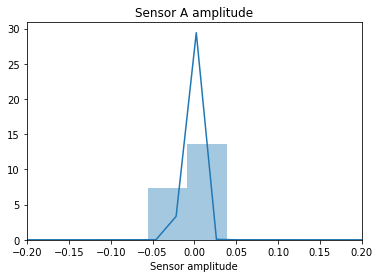

In [10]:
sns.distplot(data[0,:])
plt.title("Sensor A amplitude")
plt.xlabel("Sensor amplitude")
plt.xlim([-0.2, 0.2])

(-0.2, 0.2)

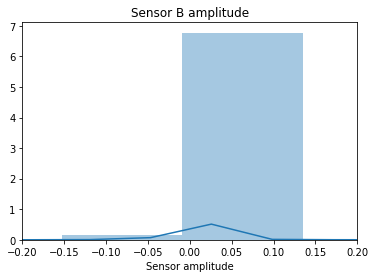

In [11]:
sns.distplot(data[1,:])
plt.title("Sensor B amplitude")
plt.xlabel("Sensor amplitude")
plt.xlim([-0.2, 0.2])

(-0.2, 0.2)

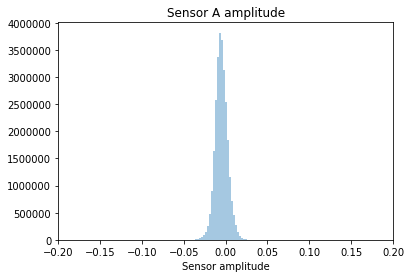

In [11]:
sns.distplot(data[0,:], bins = 1000, kde = False)
plt.title("Sensor A amplitude")
plt.xlabel("Sensor amplitude")
plt.xlim([-0.2, 0.2])

(-0.2, 0.2)

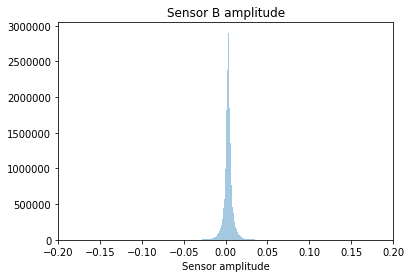

In [12]:
sns.distplot(data[1,:], bins = 10000, kde = False)
plt.title("Sensor B amplitude")
plt.xlabel("Sensor amplitude")
plt.xlim([-0.2, 0.2])